In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Importing Data (from Titanic competition on Kaggle)

In [2]:
train_set = pd.read_csv('train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_set = pd.read_csv('test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

In [4]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Random Forest Classifier Model from Tutorial

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
y = train_set['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X = pd.get_dummies(train_set[features])
X_test = pd.get_dummies(test_set[features])

model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model1.fit(X,y)
predictions = model1.predict(X_test)

result1 = pd.DataFrame({'PassengerId' : test_set['PassengerId'], 'Survived' : predictions})
result1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [10]:
result1.to_csv('submission1.csv', index=False)

#### **Score (from Kaggle): 0.77511**

## Correlation Between Survival and Features

In [11]:
train_set[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [12]:
train_set[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
train_set[['Survived', 'SibSp']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [14]:
train_set[['Survived', 'Parch']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


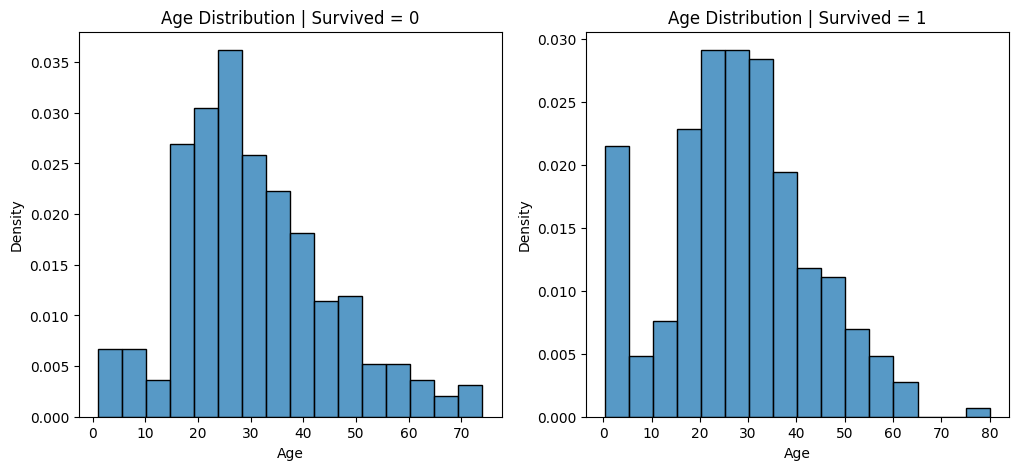

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(train_set[train_set['Survived'] == 0], x='Age', ax=ax[0], stat='density');
ax[0].set_title('Age Distribution | Survived = 0');
sns.histplot(train_set[train_set['Survived'] == 1], x='Age', ax=ax[1], stat='density');
ax[1].set_title('Age Distribution | Survived = 1');

Younger passengers seem to have survived more, so age appears to be a good feature to add to the model, as well as maybe a variable that indicates whether the passenger is a child or not.

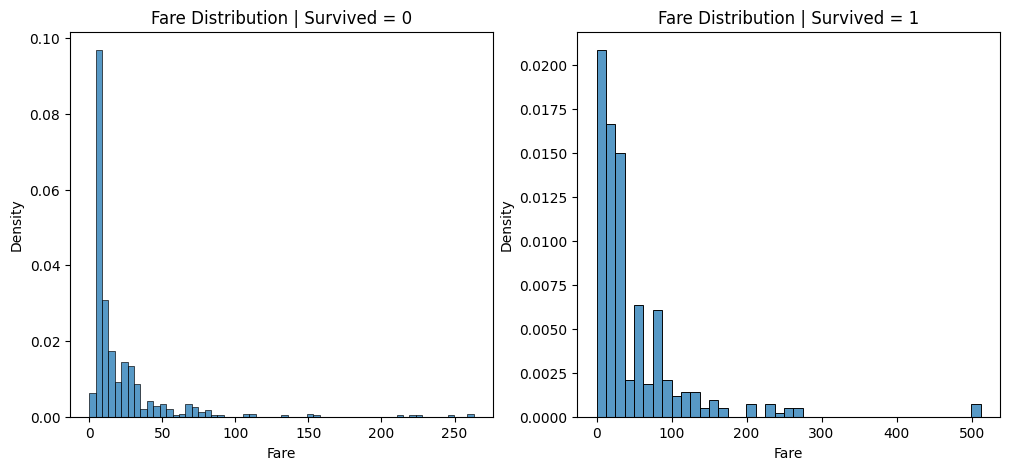

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(train_set[train_set['Survived'] == 0], x='Fare', ax=ax[0], stat='density');
ax[0].set_title('Fare Distribution | Survived = 0');
sns.histplot(train_set[train_set['Survived'] == 1], x='Fare', ax=ax[1], stat='density');
ax[1].set_title('Fare Distribution | Survived = 1');

Based on survival rates by various factors above, `Pclass`, `Sex`, and `Age`, seem to have a stronger correlation with survival than `SibSp`, `Parch`, and `Fare`.

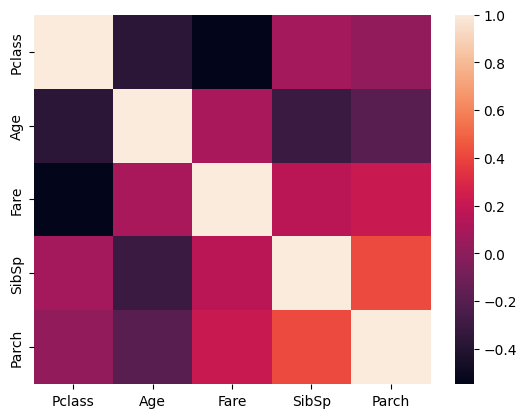

In [17]:
sns.heatmap(train_set[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr());

`Parch` and `SibSp` appear to be pretty correlated, so they might be able to be combined into one variable.

## Pre-Processing

### Adding Age and Fare Bins

First, I replaced all NaN values with the median age for the training and test sets so there would be no null values in the dataset.

In [18]:
med_age_train = train_set['Age'].median()
med_age_test = test_set['Age'].median()
train_set['Age'] = train_set['Age'].replace(np.nan, med_age_train)
test_set['Age'] = train_set['Age'].replace(np.nan, med_age_test)

In [19]:
age_labels = [1, 2, 3, 4, 5]
train_set['Age_Bins'] = pd.cut(train_set['Age'], bins=5, labels=age_labels)
test_set['Age_Bins'] = pd.cut(test_set['Age'], bins=5, labels=age_labels)

In [20]:
train_set[['Survived', 'Age_Bins']].groupby('Age_Bins', observed=False).mean()

,Survived
Age_Bins,
1,0.550000
2,0.344168
3,0.404255
4,0.434783
5,0.090909


In [21]:
fare_labels = [1, 2, 3, 4]
train_set['Fare_Bins'] = pd.qcut(train_set['Fare'], 4, labels=fare_labels)
test_set['Fare_Bins'] = pd.qcut(test_set['Fare'], 4, labels=fare_labels)

In [22]:
train_set[['Survived', 'Fare_Bins']].groupby('Fare_Bins', observed=False).mean()

,Survived
Fare_Bins,
1,0.197309
2,0.303571
3,0.454955
4,0.581081


### Child

From what I know about the Titanic as well as what the data shows in terms of the age distribution, children were more likely to survive compared to older passengers. Therefore, I created a variable that indicates whether the passenger is a child (<16 years) or not.

In [23]:
train_set['Child'] = np.where(train_set['Age'] < 16, 1, 0)
test_set['Child'] = np.where(test_set['Age'] < 16, 1, 0)

In [24]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bins,Fare_Bins,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,4,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,4,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,2,0


### Combining Family Variables

From the correlations above, `SibSp` and `Parch` do not seem to have much of a correlation with `Survived` and are also correlated with each other, so I combined them into one variable `Total_Family`.

In [25]:
train_set['Total_Family'] = train_set['SibSp'] + train_set['Parch']
test_set['Total_Family'] = test_set['SibSp'] + test_set['Parch']

In [26]:
train_set[['Survived', 'Total_Family']].groupby('Total_Family').mean()

,Survived
Total_Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


### Title

Another variable that could be added comes from `Name`, which is the title of the passenger. Since it could have a correlation with the sex and class of the passenger, this could a feature that improves the accuracy of the model.

In [27]:
train_set['Title'] = train_set['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()
test_set['Title'] = test_set['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()

In [28]:
train_set.groupby('Title').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bins,Fare_Bins,Child,Total_Family
Title,,,,,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Don,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Dr,7,7,7,7,7,7,7,7,7,7,3,7,7,7,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,40,40,40,40,40,7,40,40,40,40,40
Miss,182,182,182,182,182,182,182,182,182,182,47,181,182,182,182,182


In [29]:
test_set.groupby('Title').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bins,Fare_Bins,Child,Total_Family
Title,,,,,,,,,,,,,,,
Col,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Dona,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dr,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Master,21,21,21,21,21,21,21,21,21,2,21,21,21,21,21
Miss,78,78,78,78,78,78,78,78,78,11,78,78,78,78,78
Mr,240,240,240,240,240,240,240,240,239,42,240,240,239,240,240
Mrs,72,72,72,72,72,72,72,72,72,32,72,72,72,72,72
Ms,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Rev,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2


Based on the titles of both the train and test datasets, four of the titles—Master, Miss, Mr, and Mrs—are far more common than the rest. Therefore, I combined all of the rest of the titles into one title called Other. In addition, Mlle and Ms are the same as Miss, while Mme is the same as Mrs, so those can be combined.

In [30]:
train_set['Title'] = train_set['Title'].str.replace('Mlle', 'Miss')
train_set['Title'] = train_set['Title'].str.replace('Ms', 'Miss')
train_set['Title'] = train_set['Title'].str.replace('Mme', 'Mrs')

test_set['Title'] = test_set['Title'].str.replace('Mlle', 'Miss')
test_set['Title'] = test_set['Title'].str.replace('Ms', 'Miss')
test_set['Title'] = test_set['Title'].replace('Mme', 'Mrs')

In [31]:
freq_titles = ['Master', 'Miss', 'Mr', 'Mrs']
train_set['Title'] = np.where(train_set['Title'].isin(freq_titles), train_set['Title'], 'Other')
test_set['Title'] = np.where(test_set['Title'].isin(freq_titles), test_set['Title'], 'Other')

Finally, I converted the titles into a numerical variable for the model.

In [32]:
train_set['Title'] = train_set['Title'].replace(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], [1,2,3,4,5])
test_set['Title'] = test_set['Title'].replace(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], [1,2,3,4,5])

### Dropping Columns

`PassengerId`, and `Ticket` seem like arbitrary variables that don't appear to be correlated with survival rates, so I decided to drop them. `Age`, `Fare`, `SibSp`, and `Parch` were dropped as other columns were created with the same information. `PassengerId` was not dropped in the test data so that it can be used in the submission file to Kaggle. `Cabin` was dropped because it contains many missing values, and `Name` was dropped as the title was already extracted from it.

In [33]:
train_set = train_set.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Cabin'])
test_set = test_set.drop(columns=['Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Cabin'])

In [34]:
train_set.head()

,Survived,Pclass,Sex,Embarked,Age_Bins,Fare_Bins,Child,Total_Family,Title
0,0,3,male,S,2,1,0,1,3
1,1,1,female,C,3,4,0,1,4
2,1,3,female,S,2,2,0,0,2
3,1,1,female,S,3,4,0,1,4
4,0,3,male,S,3,2,0,0,3


### Sex

In [35]:
train_set['Sex'] = train_set['Sex'].replace(['male', 'female'], [0,1])
test_set['Sex'] = test_set['Sex'].replace(['male', 'female'], [0,1])

### Embarked

In [36]:
train_set['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

There seem to be missing variables in the training set for `Embarked`, so I replaced them with the port that had the most frequency.

In [37]:
train_set.groupby('Embarked').count()

,Survived,Pclass,Sex,Age_Bins,Fare_Bins,Child,Total_Family,Title
Embarked,,,,,,,,
C,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644


In [38]:
train_set['Embarked'] = train_set['Embarked'].replace(np.nan, 'S')

Then, I converted this variable into numerical values to use in the model.

In [39]:
train_set['Embarked'] = train_set['Embarked'].replace(['S', 'Q', 'C'], [1, 2, 3])
test_set['Embarked'] = test_set['Embarked'].replace(['S', 'Q', 'C'], [1, 2, 3])

### Interaction between Pclass and Sex

Finally, I added a variable for the interaction between `Pclass` and `Sex`, because there seems to be a correlation between the two, as male and female passengers in upper classes have a higher survival rate than in lower ones.

In [40]:
train_set[['Survived', 'Pclass', 'Sex']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex          
1      0    0.368852
       1    0.968085
2      0    0.157407
       1    0.921053
3      0    0.135447
       1    0.500000

In [41]:
train_set['Pclass*Sex'] = train_set["Pclass"].astype(str) + "_" + train_set["Sex"].astype(str)
test_set['Pclass*Sex'] = test_set["Pclass"].astype(str) + "_" + test_set["Sex"].astype(str)

In [42]:
train_set.head()

,Survived,Pclass,Sex,Embarked,Age_Bins,Fare_Bins,Child,Total_Family,Title,Pclass*Sex
0,0,3,0,1,2,1,0,1,3,3_0
1,1,1,1,3,3,4,0,1,4,1_1
2,1,3,1,1,2,2,0,0,2,3_1
3,1,1,1,1,3,4,0,1,4,1_1
4,0,3,0,1,3,2,0,0,3,3_0


In [43]:
test_set.head()

,PassengerId,Pclass,Sex,Embarked,Age_Bins,Fare_Bins,Child,Total_Family,Title,Pclass*Sex
0,892,3,0,2,2,1,0,0,3,3_0
1,893,3,1,1,3,1,0,1,4,3_1
2,894,2,0,2,2,2,0,0,3,2_0
3,895,3,0,1,3,2,0,0,3,3_0
4,896,3,1,1,3,2,0,2,4,3_1


## Comparing Models

### Random Forests

In [44]:
features1 = ['Pclass', 'Sex', 'Age_Bins', 'Fare_Bins']
features2 = ['Pclass', 'Sex', 'Embarked', 'Age_Bins', 'Fare_Bins', 'Child', 'Total_Family', 'Title', 'Pclass*Sex']

X_1 = pd.get_dummies(train_set[features1])
X_2 = pd.get_dummies(train_set[features2])

# with age and fare bins
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model2.fit(X_1,y)

# with all features
model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model3.fit(X_2,y)

RandomForestClassifier(max_depth=5, random_state=1)

In [45]:
print('Original Model Score:', model1.score(X,y))

Original Model Score: 0.8159371492704826


In [46]:
print('With Age and Fare Bins:', model2.score(X_1, y))

With Age and Fare Bins: 0.8260381593714927


In [47]:
print('With All Features:', model3.score(X_2, y))

With All Features: 0.8439955106621774


Comparing all of the Random Forest models, the one with all features had the highest score.

### Support Vector Machines

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC()
svc.fit(X_2, y)

SVC()

In [50]:
print('SVC Score:', svc.score(X_2, y))

SVC Score: 0.8361391694725028


The SVC score is higher than the original model, but falls short of the other Random Forest models.

### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_2, y)

DecisionTreeClassifier()

In [53]:
print('Decision Tree Score:', dec_tree.score(X_2, y))

Decision Tree Score: 0.8866442199775533


The decision tree score is the highest so far of all of the models.

## Testing on Kaggle

In [54]:
X_test = pd.get_dummies(test_set[features2])

### Random Forest Model with Processed Features

In [55]:
rfm = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfm.fit(X_2,y)
predictions_rfm = rfm.predict(X_test)

result_rfm = pd.DataFrame({'PassengerId' : test_set['PassengerId'], 'Survived' : predictions_rfm})
result_rfm.to_csv('rfm.csv', index=False)

**Score:** 0.78708

### SVM

In [56]:
svc = SVC()
svc.fit(X_2, y)
predictions_svm = svc.predict(X_test)

result_svm = pd.DataFrame({'PassengerId' : test_set['PassengerId'], 'Survived' : predictions_svm})
result_svm.to_csv('svm.csv', index=False)

**Score:** 0.79186

### Decision Tree

In [57]:
dtree = DecisionTreeClassifier()
dtree.fit(X_2, y)
predictions_dtree = dtree.predict(X_test)

result_dtree = pd.DataFrame({'PassengerId' : test_set['PassengerId'], 'Survived' : predictions_dtree})
result_dtree.to_csv('dtree.csv', index=False)

**Score:** 0.77033

Based on the scores from Kaggle, the model with the best results is the Support Vector Machines model, with a score of 79.19%.